In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sys
import os

from skimage.morphology import binary_erosion, binary_dilation, disk
from skimage.measure import label

sys.path.append('/Users/Michael/projects/shape_sharing/src/')
from common import paths, voxel_data, images, parameters, scene

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
sequence = paths.RenderedData.test_sequence()[0]

sc = scene.Scene()
sc.load_sequence(sequence, frame_nos=0, segment_with_gt=True, save_grids=False)


Fusing frame number 0 with name 01_0013
597465
434236
537257
550250
434023
434094
Separate out the partial tsdf into different 'layers' in a grid...
597465
434236
537257
550250
434023
434094
597465


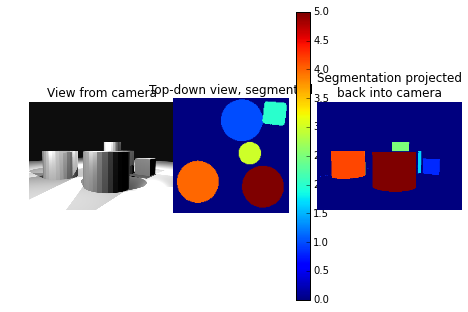

In [46]:
fig = plt.figure(figsize=(12, 10))
plt.subplots(1, 3)
spacing = 1e-3
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=spacing, hspace=spacing)

plt.subplot(1, 3, 1)
plt.imshow(sc.im.rgb)
plt.axis('off')
plt.title('View from camera')
plt.subplot(1, 3, 2)
plt.imshow(sc.gt_labels.V[:, :, 13])
plt.colorbar()
plt.axis('off')
plt.title('Top-down view, segmented')
plt.subplot(1, 3, 3)
plt.imshow(sc.visible_im_label)
plt.axis('off')
plt.title('Segmentation projected \nback into camera')

plt.savefig('/tmp/views.pdf')

38656.0
589050
42144.0
428120
40992.0
529690
39424.0
542500
42272.0
427910
42304.0
427980


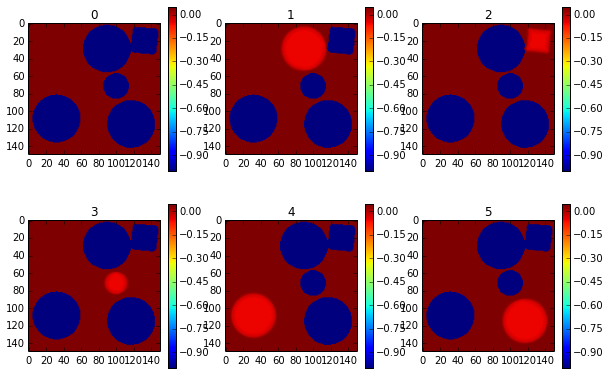

In [50]:
plt.figure(figsize=(10, 10))

for idx, grid in sc.gt_tsdf_separate.iteritems():
    plt.subplot(3, 3, idx+1)
    T = grid.V[:, :, 15]
    T[np.isnan(T)] = -0.01
    plt.imshow(T)
    plt.colorbar()
    plt.title(idx)
    
    print np.nansum(grid.V)
    print np.isnan(grid.V).sum()